### 1. Demographic:

        a. Which 2 demographics have proven to be the most popular with the telco brand?
        b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

### 2. Services:
        a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)
        b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

### 3. Payment: (Use visualizations in explaining your analysis)
        a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
        i. Basic
        ii. Plus
        iii. Premium
        b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls


 Volume in drive C has no label.
 Volume Serial Number is C889-D157

 Directory of C:\Users\user\Documents\Africa Data School\Assignment4

10/29/2020  07:53 AM    <DIR>          .
10/29/2020  07:53 AM    <DIR>          ..
10/28/2020  07:06 AM    <DIR>          .ipynb_checkpoints
10/29/2020  07:53 AM           119,159 Telco Customer Churn Analysis.ipynb
10/22/2020  11:43 PM           397,855 Telco Customer Churn.pdf
06/09/2020  12:02 AM           977,501 WA_Fn-UseC_-Telco-Customer-Churn.csv
               3 File(s)      1,494,515 bytes
               3 Dir(s)  370,462,732,288 bytes free


In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['Count'] = 1
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,1


In [4]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,1
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No,1
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No,1
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,1
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,1


In [5]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Count'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'].dtypes


dtype('O')

In [8]:
# Changing the datatype of TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')

In [9]:
df['TotalCharges'].dtypes

dtype('float32')

### 1. Demographics

In [10]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
df['Count'] = 1

In [13]:
df1 = df[['gender', 'SeniorCitizen']]
df1.groupby(['gender', 'SeniorCitizen']).count().reset_index()

,gender,SeniorCitizen
0,Female,0
1,Female,1
2,Male,0
3,Male,1


Text(0, 0.5, 'No of subscribers')

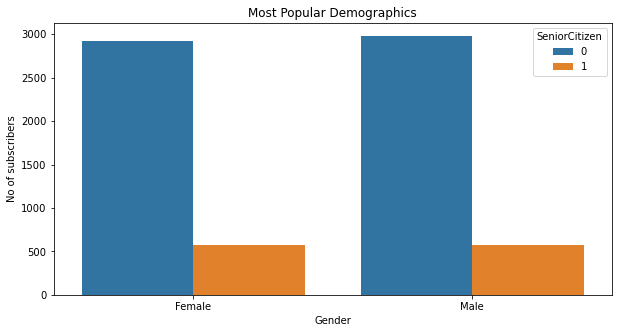

In [14]:
%matplotlib inline
#Most popular demographics
df_demo=df.groupby(["gender", "SeniorCitizen"])["Count"].count().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="gender", y= "Count", hue="SeniorCitizen", data=df_demo)
plt.title("Most Popular Demographics")
plt.xlabel("Gender")
plt.ylabel("No of subscribers")

The telco brand is more popular among female and male subscribers who are not senior citizens. To increase customer retention, the marketing team needs to target their advertisements to senior citizens. 

### 2. Services

In [15]:
churn_df = df[['PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Contract', 'Churn']][df['Churn'] == "Yes"]

churn_df.head()   

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Contract,Churn
2,Yes,DSL,Yes,Yes,No,No,No,No,53.85,Month-to-month,Yes
4,Yes,Fiber optic,No,No,No,No,No,No,70.70,Month-to-month,Yes
5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Month-to-month,Yes
8,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Month-to-month,Yes
13,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Month-to-month,Yes


#### Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

In [16]:
df['MonthlyCharges'].max()

118.75

In [25]:
df_maxprice = df[['PhoneService','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Churn']][df['MonthlyCharges'] == 118.75]
df_maxprice

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
4586,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,118.75,No


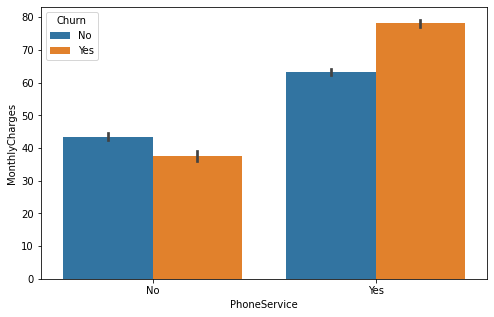

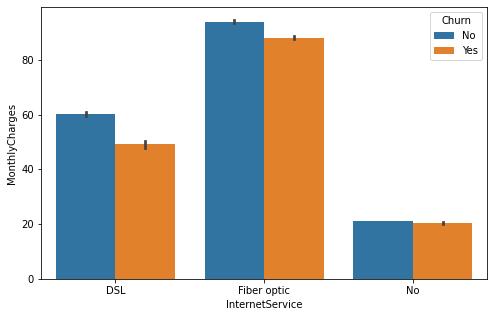

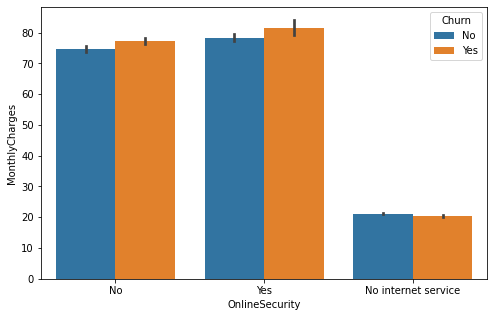

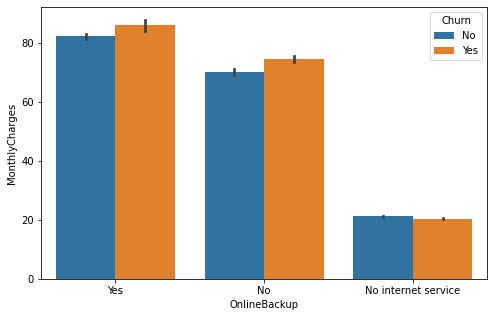

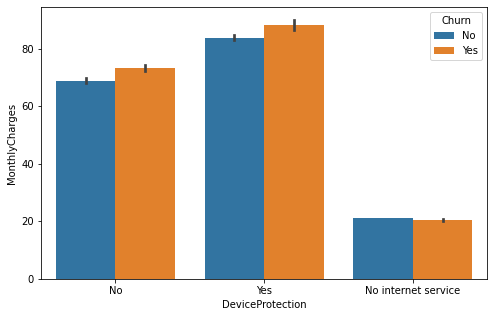

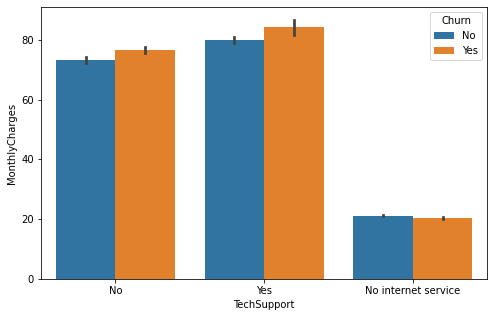

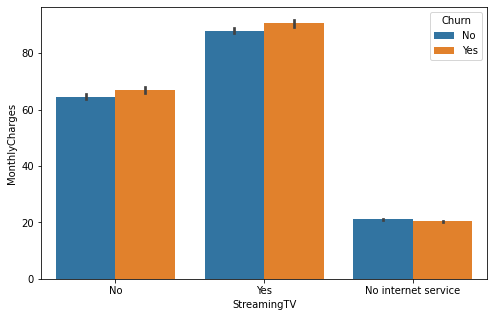

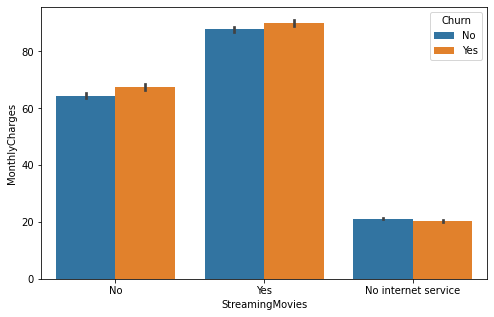

In [27]:
for col in ['PhoneService','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies']:
        plt.figure(figsize=(8,5))
        sns.barplot(x=col, y='MonthlyCharges', hue='Churn', data=df, palette="tab10")
        plt.show()

#### If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [ ]:
df['Contract'].value_counts()

Text(0, 0.5, 'No of subscribers')

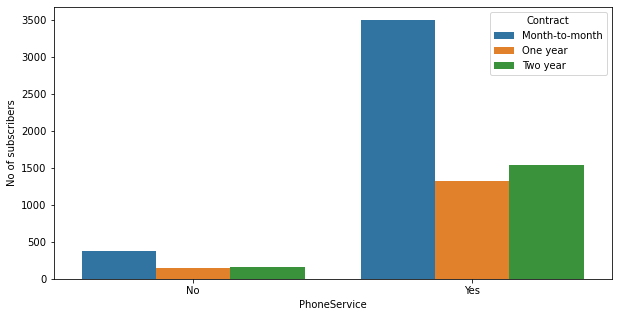

In [20]:
df_phone=df.groupby(["PhoneService", "Contract"])["Count"].count().reset_index()
plt.figure(figsize=(10,5))
sns.countplot(x="PhoneService", hue="Contract", data=df)
plt.xlabel("PhoneService")
plt.ylabel("No of subscribers")

The month-to-month contract is the most likely preferred term of contract by a customer who has subscribed to phone service. Therefore this would be the best option for customer retention if the telco was to offer phone service as a standalone service.

### 3. Payment

In [ ]:
df3 = df[['MonthlyCharges','Churn','Count']]
df3.groupby(['MonthlyCharges','Churn']).count().reset_index()

#### If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning: i. Basic, ii. Plus, iii. Premium

In [23]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Text(0.5, 0, 'MonthlyCharges')

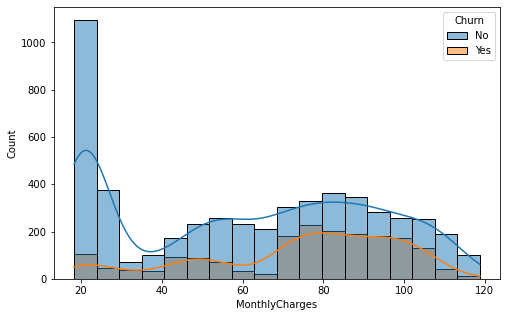

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(x="MonthlyCharges", hue ="Churn", data=df, kde=True,)
plt.xlabel("MonthlyCharges")

#### Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [ ]:
df['PaperlessBilling'].value_counts()

Text(0, 0.5, 'No of subscribers')

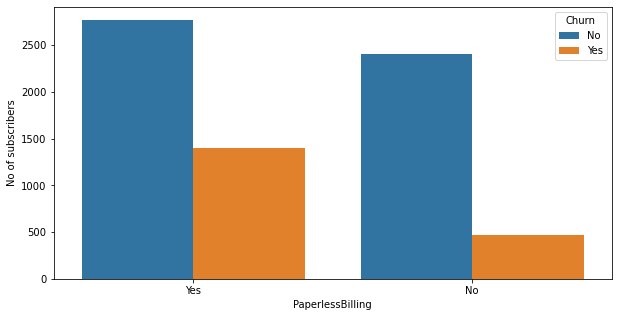

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
plt.xlabel("PaperlessBilling")
plt.ylabel("No of subscribers")

The company should not go strictly paperless because a customer who uses paperless billing is more likely to churn.